In [1]:
import os

# Clone ECP repository if not already cloned
if not os.path.exists("ECP"):
    os.system("git clone https://github.com/fouratifares/ECP.git")

In [2]:
cd ECP

/content/ECP


In [6]:
from optimizers.ECP import ECP
import numpy as np
import matplotlib.pyplot as plt

# Running ECP on Your Own Function

In [7]:
class Function:

    def __init__(self) -> None:
        self.bounds = np.array([(-10, 10), (-10, 10)])
        self.dimensions = 2

    def __call__(self, x: np.ndarray = None) -> float:

        if x is not None:
            # Handle input as a numpy array
            if len(x) != self.dimensions:
                raise ValueError(f"Input must have {self.dimensions} dimensions.")

        # Function
        reward = 20 * np.exp(-0.2 * np.sqrt(0.5 * ((x[0] + 1) ** 2 + (x[1] + 1) ** 2))) + np.exp(
            0.5 * (np.cos(2 * np.pi * (x[0] + 1)) + np.cos(2 * np.pi * (x[1] + 1)))) - np.exp(1) - 20

        return reward

The Global Search is Completed
Best Point: [-0.91002759 -1.03811494]
Maximum Value: -0.5135425498845656




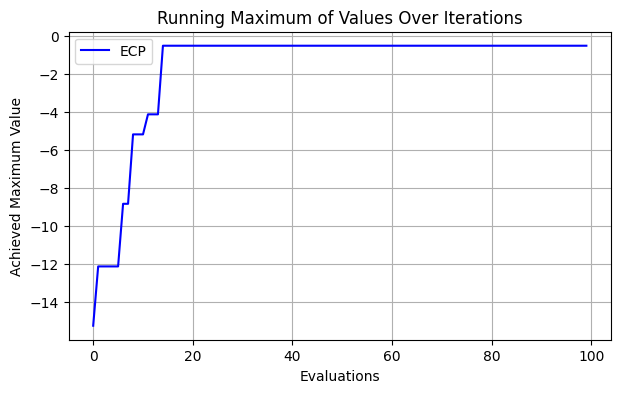

In [8]:
f = Function()
points, values, epsilons = ECP(f, n = 100)

# Retrieve the corresponding point
best_point = points[np.argmax(values)]

print("The Global Search is Completed")
print("Best Point:", best_point)
print("Maximum Value:", max(values))
print("\n")

# Compute running maximum
running_max = np.maximum.accumulate(values)

# Plot
plt.figure(figsize=(7, 4))
plt.plot(running_max, label="ECP", color="blue")
plt.xlabel("Evaluations")
plt.ylabel("Achieved Maximum Value")
plt.title("Running Maximum of Values Over Iterations")
plt.legend()
plt.grid()
plt.show()